In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
import numpy as np
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
d1 = pd.read_csv(r'C:\Users\nonam\Jupyter\ks-projects-201612.csv', encoding='cp1251')
d1 = d1.drop(columns=['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']) # Удаление лишних столбцов
d1 = d1.rename(columns={"ID ": "ID", "name ": "name", "category  ": "category", "main_category ": "main_category", "currency ": "currency", "deadline ": "deadline", "goal ": "goal", "launched ": "launched", "pledged ": "pledged", "state ": "state", "backers ": "backers", "country ": "country", "usd pledged ": "usd pledged"})
d2 = pd.read_csv(r'C:\Users\nonam\Jupyter\ks-projects-201801.csv')

C:\Users\nonam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
d2

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [4]:
d1

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20
323748,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200


In [5]:
list(d1)#['state']#.value_counts()

['ID',
 'name',
 'category ',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'backers',
 'country',
 'usd pledged']

In [6]:
list(d2)

['ID',
 'name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'backers',
 'country',
 'usd pledged',
 'usd_pledged_real',
 'usd_goal_real']

In [7]:
d2['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [8]:
d2 = d2.query("state not in ['undefined', 'live', 'suspended']")   

In [9]:
d2

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


ID: internal kickstarter id
name: name of project - A project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films.
category: category
main_category: category of campaign
currency: currency used to support
deadline: deadline for crowdfunding
goal fundraising goal - The funding goal is the amount of money that a creator needs to complete their project.
launched: date launched
pledged: amount pledged by "crowd"
state: Current condition the project is in
backers: number of backers
country: country pledged from
usd pledged: amount of money pledged
usd_pledged_real: Pledged amount in USD (conversion made by fixer.io api)
usd_goal_real: Goal amount in USD


Синтетические данные:
1. Продолжительность сбора
2. Валюта, приведённая к доллару
3. Вклад одного бейкера
4. Мешок слов для названия
5. Количество прописных букв - count_A
6. Количество слов - word_count
7. Месяц запуска
8. День недели запуска
?9. Средний гоал на одного человека
?10. Средний гоал категории
?11. Средний гоал подкатегории

In [10]:
def uppercase_count(x):
    return len(re.findall(r'[A-Z]', x))

def word_count(x):
    return len(re.findall(r' ', x)) + 1

d3 = d2[['usd_goal_real']].copy(deep=True)
d3['word_count'] = d2['name'].transform(lambda x: word_count(str(x)))
d3['uppercase_count'] = d2['name'].transform(lambda x: uppercase_count(str(x)))
d3

,usd_goal_real,word_count,uppercase_count
0,1533.95,6,4
1,30000.00,8,12
2,45000.00,3,2
3,5000.00,7,7
4,19500.00,8,7
...,...,...,...
378656,50000.00,6,6
378657,1500.00,2,2
378658,15000.00,11,5
378659,15000.00,3,4


In [11]:
arr = ['category', 'main_category', 'currency', 'state', 'country']
for i in arr:
    le = LabelEncoder()
    d3[i] = le.fit_transform(d2[i])

In [12]:
d3['name'] = d2['name'].apply(lambda x: len(str(x)))

In [13]:
d2['deadline'] = pd.to_datetime(d2['deadline'])
d2['launched'] = pd.to_datetime(d2['launched'])

C:\Users\nonam\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\nonam\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
d3['weekday_launched'] = d2['launched'].dt.weekday

In [15]:
d3['month_launched'] = d2['launched'].dt.month

In [16]:
# def season_func(x):
#     if x in range(1,3) or x == 12:
#         return 1
#     elif x in range(3,6):
#         return 2
#     elif x in range(6, 9):
#         return 3
#     elif x in range(9, 12):
#         return 4

# d3['season_launched'] = d3['month_launched'].apply(lambda x: season_func(x))

In [17]:
type(d2['deadline'].iloc[0])
d2['newdatetime'] = abs(d2['deadline'] - d2['launched'])

C:\Users\nonam\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
type(d2['newdatetime'].iloc[0])
d3['duration'] = d2['newdatetime'].apply(lambda x: x.days)

In [19]:
d2.drop(columns=['deadline', 'launched', 'newdatetime'], inplace=True)
#d2.drop(columns=['ID', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], inplace=True)
d2.drop(columns=['pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], inplace=True)

C:\Users\nonam\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
d3

,usd_goal_real,word_count,uppercase_count,category,main_category,currency,state,country,name,weekday_launched,month_launched,duration
0,1533.95,6,4,108,12,5,1,9,31,1,8,58
1,30000.00,8,12,93,6,13,1,22,45,5,9,59
2,45000.00,3,2,93,6,13,1,22,14,5,1,44
3,5000.00,7,7,90,10,13,1,22,49,5,3,29
4,19500.00,8,7,55,6,13,0,22,58,5,7,55
...,...,...,...,...,...,...,...,...,...,...,...,...
378656,50000.00,6,6,39,6,13,0,22,49,2,9,29
378657,1500.00,2,2,93,6,13,1,22,9,2,6,26
378658,15000.00,11,5,93,6,13,1,22,71,3,7,45
378659,15000.00,3,4,138,13,13,1,22,24,2,1,30


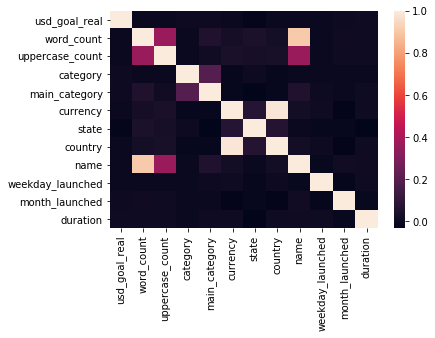

In [21]:
sns.heatmap(d3.corr())

In [22]:
y = d3['state']
X = d3.drop(columns=['state'])

In [23]:
print(len(d3))
print(len(d2))

370454
370454


tf-idf Векторизация текстовых признаков

In [24]:
X_name = d2['name'].str.lower()
# \(", "\)", "-", ":", "[0-9]", "$", "#", "%", "
X_name = X_name.replace(["(canceled)", "[^A-Z^a-z^!^?^ ]"], '', regex=True)
X_name = X_name.replace(to_replace="\?", value=' ?', regex=True)
X_name = X_name.replace(to_replace="\!", value=' !', regex=True)
X_name.fillna('0', inplace=True)

tf_vectorizer = TfidfVectorizer()
X_name = tf_vectorizer.fit_transform(X_name)

kmeans = KMeans(n_clusters=10, random_state=101).fit(X_name)


kmeans.labels_

X['tf_idf_name'] = kmeans.labels_

In [25]:
arr = ['usd_goal_real', 'word_count', 'uppercase_count', 'category', 'main_category', 'currency', 'name', 'duration', 'country']
for i in arr:
    scaler = StandardScaler()
    X[[i]] = scaler.fit_transform(X[[i]])


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
mod = xgb.XGBClassifier(n_jobs=-1)
mod.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [27]:
y_pred = mod.predict(X_test)
#predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 60.61%


Без нормализации Accuracy: 60.29%
C нормализацией: Accuracy: 60.36%
С TF-IDF: Accuracy: 60.57%
Accuracy: 60.53%

In [28]:
LogRes = LogisticRegression(random_state=0)
LogRes.fit(X_train, y_train)
ylr_pred = LogRes.predict(X_test)
ylr_pred

C:\Users\nonam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1, 1, 1, ..., 2, 1, 1])

In [29]:
accuracy_lr = accuracy_score(y_test, ylr_pred)
print("Accuracy for Logistic Regression: %.2f%%" % (accuracy_lr * 100.0))

Accuracy for Logistic Regression: 55.19%


In [30]:
per = Perceptron(random_state=101)
per.fit(X_train, y_train)
yper_pred = per.predict(X_test)
accuracy_per = accuracy_score(y_test, yper_pred)
print("Accuracy for Perceptron: %.2f%%" % (accuracy_per * 100.0))

Accuracy for Perceptron: 37.28%


In [31]:
X

,usd_goal_real,word_count,uppercase_count,category,main_category,currency,country,name,weekday_launched,month_launched,duration,tf_idf_name
0,-0.038592,0.106636,-0.334483,0.602129,1.151402,-1.531966,-1.577355,-0.240757,1,8,0.405238,5
1,-0.013362,0.826203,1.256764,0.270764,-0.381766,0.503581,0.493720,0.637379,5,9,0.421715,8
2,-0.000068,-0.972714,-0.732294,0.270764,-0.381766,0.503581,0.493720,-1.307064,5,1,0.174554,1
3,-0.035520,0.466420,0.262235,0.204491,0.640346,0.503581,0.493720,0.888275,5,3,-0.072608,6
4,-0.022669,0.826203,0.262235,-0.568694,-0.381766,0.503581,0.493720,1.452790,5,7,0.355805,5
...,...,...,...,...,...,...,...,...,...,...,...,...
378656,0.004364,0.106636,0.063329,-0.922150,-0.381766,0.503581,0.493720,0.888275,2,9,-0.072608,1
378657,-0.038623,-1.332497,-0.732294,0.270764,-0.381766,0.503581,0.493720,-1.620684,2,6,-0.122040,7
378658,-0.026657,1.905553,-0.135577,0.270764,-0.381766,0.503581,0.493720,2.268202,3,7,0.191031,5
378659,-0.026657,-0.972714,-0.334483,1.264859,1.406930,0.503581,0.493720,-0.679825,2,1,-0.056131,1


In [32]:
X

,usd_goal_real,word_count,uppercase_count,category,main_category,currency,country,name,weekday_launched,month_launched,duration,tf_idf_name
0,-0.038592,0.106636,-0.334483,0.602129,1.151402,-1.531966,-1.577355,-0.240757,1,8,0.405238,5
1,-0.013362,0.826203,1.256764,0.270764,-0.381766,0.503581,0.493720,0.637379,5,9,0.421715,8
2,-0.000068,-0.972714,-0.732294,0.270764,-0.381766,0.503581,0.493720,-1.307064,5,1,0.174554,1
3,-0.035520,0.466420,0.262235,0.204491,0.640346,0.503581,0.493720,0.888275,5,3,-0.072608,6
4,-0.022669,0.826203,0.262235,-0.568694,-0.381766,0.503581,0.493720,1.452790,5,7,0.355805,5
...,...,...,...,...,...,...,...,...,...,...,...,...
378656,0.004364,0.106636,0.063329,-0.922150,-0.381766,0.503581,0.493720,0.888275,2,9,-0.072608,1
378657,-0.038623,-1.332497,-0.732294,0.270764,-0.381766,0.503581,0.493720,-1.620684,2,6,-0.122040,7
378658,-0.026657,1.905553,-0.135577,0.270764,-0.381766,0.503581,0.493720,2.268202,3,7,0.191031,5
378659,-0.026657,-0.972714,-0.334483,1.264859,1.406930,0.503581,0.493720,-0.679825,2,1,-0.056131,1


In [33]:
d1

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20
323748,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200


In [34]:
datetime.weekday()

NameError: name 'datetime' is not defined